In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

FN_DATA = 'data/train.csv'
FN_TEST = 'data/test.csv'

In [2]:
df = pd.read_csv(FN_DATA)
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [3]:
df_test = pd.read_csv(FN_TEST)
df_test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


- Age has missing data for both train and test samples
- Fare is missing in the test sample

# Density plots

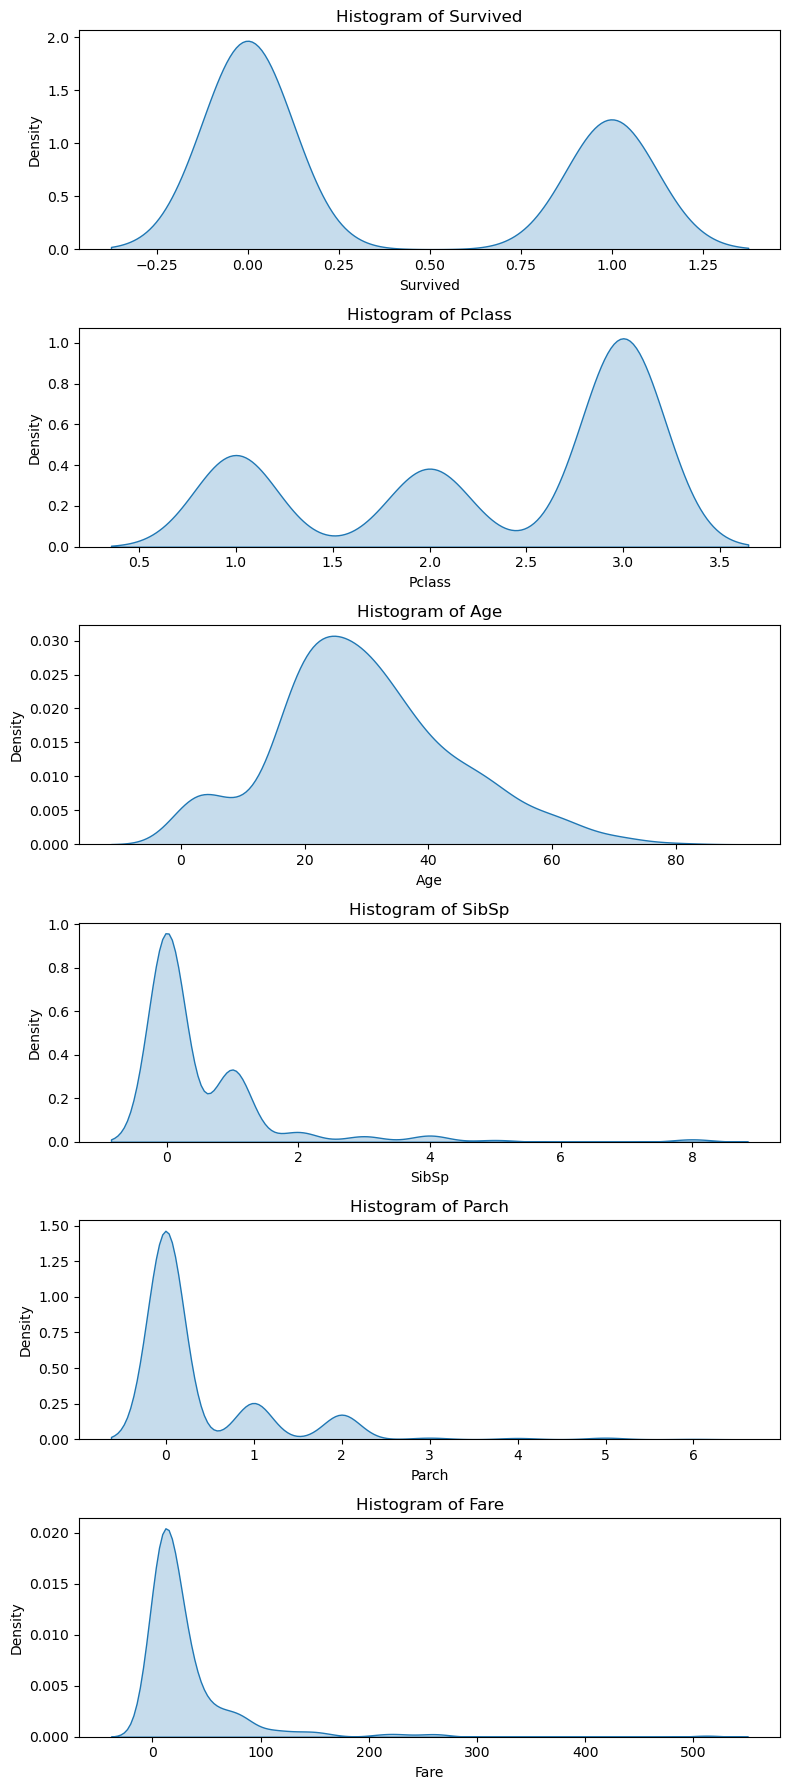

In [38]:
plot_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

fig, ax = plt.subplots(len(plot_cols), 1, figsize=(8, 3*len(plot_cols)))

for i, col in enumerate(plot_cols):
    sns.kdeplot(df[col], ax=ax[i], fill=True)
    ax[i].set_title(f'Histogram of {col}')

fig.tight_layout()

- Age is skewed to the right, and Fare is a normal distribution with a very long right tail
- SibSp, Parch, Survived, and Pclass are discrete variables with specific values having the highest frequency

# Correlation

<Axes: >

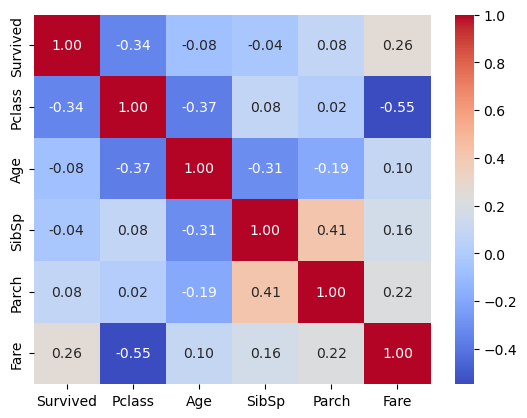

In [39]:
sns.heatmap(df[plot_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')

- Fare (postively) and Pclass (negatively) are weakly correlated to Survived. 
- Pclass and Fare, as well as Age and Pclass are also negatively correlated
- Parch and SibSp are also correlated

Feature engineering ideation
- Average/Median `Age` per `Pclass`
- Min/max `Age` per `Pclass`
- Average/Median `Fare` per `Pclass`
- Sum of `Parch` and `SibSp`

# Preprocessing

- Address missing `Age` values
    - Mean
    - Median
    - default value = 99
- Normalize values

In [40]:
fill_age = df['Age'].median()
df['Age'] = df['Age'].fillna(fill_age)

# Logistic Regression

In [41]:
x_train, x_test, y_train, y_test = train_test_split(df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']], df['Survived'], test_size=0.2)

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7318435754189944

<Axes: >

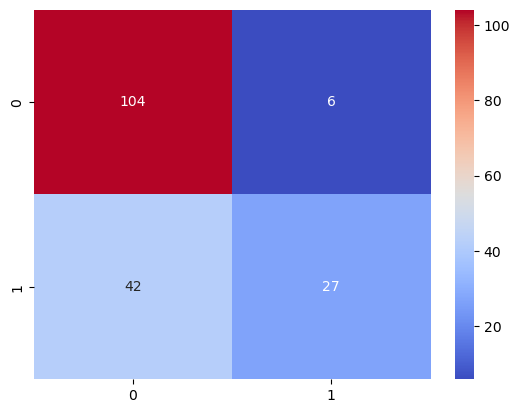

In [42]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')